# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import atlasMapping
import fixedDensity as fd

# Set Directory Paths

In [3]:
# Only used to load the FTDGeneralData_20221114.mat file --> Saved as NetworkDataGeneral
%store -r baseDir

# Directory path to load formatted Pathology Data
%store -r path_dataDir

# Directory path to save Calcualted Analysis Data
%store -r path_CalData

# Directory path to save Figures
%store -r path_Fig

In [4]:
graphDir = '/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/Pathology_Analysis/Graphs'

# [1] Loading

## Loading the preconstructed atlas data


In [5]:
# loads the preconstructed Atlas data
NetworkDataGeneral = scipy.io.loadmat(os.path.join(baseDir, 'NetworkAnalysisGeneral', 'FTDGeneralData_20221114.mat'))

## Load Covariance Matrices (Dropped)

In [6]:
# covTAU_Drop
with open(os.path.join(path_CalData, 'covTAU_Drop.pkl'), 'rb') as f:
    covTAU_Drop = pickle.load(f)
f.close()

# covTDP_Drop
with open(os.path.join(path_CalData, 'covTDP_Drop.pkl'), 'rb') as f:
    covTDP_Drop = pickle.load(f)
f.close()

# covTAU_gt_TDP_Drop
with open(os.path.join(path_CalData, 'covTAU_gt_TDP_Drop.pkl'), 'rb') as f:
    covTAU_gt_TDP_Drop = pickle.load(f)
f.close()

# covTDP_gt_TAU_Drop
with open(os.path.join(path_CalData, 'covTDP_gt_TAU_Drop.pkl'), 'rb') as f:
    covTDP_gt_TAU_Drop = pickle.load(f)
f.close()

# covTAU_gt_TDP_raw_Drop
with open(os.path.join(path_CalData, 'covTAU_gt_TDP_raw_Drop.pkl'), 'rb') as f:
    covTAU_gt_TDP_raw_Drop = pickle.load(f)
f.close()

# covTDP_gt_TAU_raw_Drop
with open(os.path.join(path_CalData, 'covTDP_gt_TAU_raw_Drop.pkl'), 'rb') as f:
    covTDP_gt_TAU_raw_Drop = pickle.load(f)
f.close()

## Loading Pathology Data (TAU, TDP) - Dropped

In [7]:
# path_TAU_Drop
with open(os.path.join(path_dataDir, 'path_TAU_Drop.pkl'), 'rb') as f:
    path_TAU_Drop = pickle.load(f)
f.close()

# path_TDP_Drop
with open(os.path.join(path_dataDir, 'path_TDP_Drop.pkl'), 'rb') as f:
    path_TDP_Drop = pickle.load(f)
f.close()

## Loading Pathology Labels (TAU, TDP) - Dropped

In [8]:
# pathNames_TAU_Drop
with open(os.path.join(path_CalData, 'pathNames_TAU_Drop.pkl'), 'rb') as f:
    pathNames_TAU_Drop = pickle.load(f)
f.close()

# pathNames_TDP_Drop
with open(os.path.join(path_CalData, 'pathNames_TDP_Drop.pkl'), 'rb') as f:
    pathNames_TDP_Drop = pickle.load(f)
f.close()

## Loading pathCoM (TAU, TDP) - Dropped

In [9]:
# CoM_TAU_Drop
with open(os.path.join(path_dataDir, 'CoM_TAU_Drop.pkl'), 'rb') as f:
    CoM_TAU_Drop = pickle.load(f)
f.close()

# CoM_TDP_Drop
with open(os.path.join(path_dataDir, 'CoM_TDP_Drop.pkl'), 'rb') as f:
    CoM_TDP_Drop = pickle.load(f)
f.close()

# [2] Draw 3D Atlas Map

## Define Variables

### Set fixed density value 

In [10]:
fd_val = 40 # Get top 100

### Define Vectors for Node Size and Node Color

In [11]:
# Log %AO of FTD TAU vs TDP
path_TAU_exp = path_TAU_Drop.copy()
path_TDP_exp = path_TDP_Drop.copy()

# Get min/max %AO of LBD
# minPath = np.nanmin(np.vstack([path_TAU_exp, path_TDP_exp]), axis=0)
# maxPath = np.nanmax(np.vstack([path_TAU_exp, path_TDP_exp]) - minPath + 0.0015, axis=0)
minPath = np.nanmin(np.concatenate((path_TAU_exp.flatten(), path_TDP_Drop.flatten())))
maxPath = np.nanmax(np.concatenate((path_TAU_exp.flatten(), path_TDP_Drop.flatten())) - minPath + 0.0015, axis=0)

# Size of Nodes --> Marker
markerVecTAU = np.nanmean(path_TAU_exp, axis=0)
markerVecTAU = 3 * (markerVecTAU - minPath) / maxPath

markerVecTDP = np.nanmean(path_TDP_exp, axis=0)
markerVecTDP = 3 * (markerVecTDP - minPath) / maxPath

cRange = [0, 1]

# Node color --> Set as red (because cm.jet: 1 --> Red)
colorVecTAU = np.ones(path_TAU_exp.shape[1])
colorVecTDP = np.ones(path_TDP_exp.shape[1])

## (1) TAU

/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/HelperFunctions/Analysis_HelperFuntions/atlasMapping.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Makes the mapping tighter --> Bigger


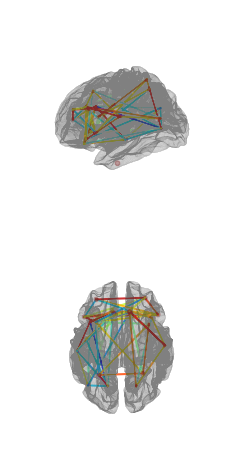

In [26]:
atlasMapping.atlasMapping(NetworkDataGeneral, covTAU_Drop, CoM_TAU_Drop, pathNames_TAU_Drop, markerVecTAU, colorVecTAU, 
                          path_Fig, '3D_Atlas_CovMat_TAU', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## (2) TDP

In [ ]:
atlasMapping.atlasMapping(NetworkDataGeneral, covTDP_Drop, CoM_TDP_Drop, pathNames_TDP_Drop, markerVecTDP, colorVecTDP, 
                          path_Fig, '3D_Atlas_CovMat_TDP', covType='original', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

## (3) TAU > TDP

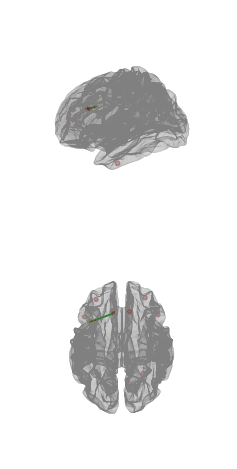

In [32]:
atlasMapping.atlasMapping(NetworkDataGeneral, covTAU_gt_TDP_Drop, CoM_TAU_Drop, pathNames_TAU_Drop, markerVecTAU, 
                          colorVecTAU, path_Fig, '3D_Atlas_CovMat_TAU_gt_TDP', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

In [ ]:
atlasMapping.save3DGraph(covTAU_gt_TDP_Drop, graphDir, "TAU_gt_TDP_Graph(Pathology)")

## (4) TDP > TAU

In [ ]:
atlasMapping.atlasMapping(NetworkDataGeneral, covTDP_gt_TAU_Drop, CoM_TDP_Drop, pathNames_TDP_Drop, markerVecTDP, 
                          colorVecTDP, path_Fig, '3D_Atlas_CovMat_TDP_gt_TAU', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

In [ ]:
atlasMapping.save3DGraph(covTDP_gt_TAU_Drop, graphDir, "TDP_gt_TAU_Graph(Pathology)")

## (5) TAU > TDP Fixed Density

In [12]:
covTAU_gt_TDP_FD = fd.fixedDensity(covTAU_gt_TDP_raw_Drop, fd_val)

In [21]:
np.count_nonzero(covTAU_gt_TDP_raw_Drop)

625

In [17]:
np.count_nonzero(covTAU_gt_TDP_FD)

80

/Users/hyroh/Desktop/FTD_Research/mBIN/FTD_JupyterNotebook/HelperFunctions/Analysis_HelperFuntions/atlasMapping.py:162: UserWarning: The figure layout has changed to tight
  plt.tight_layout() # Makes the mapping tighter --> Bigger


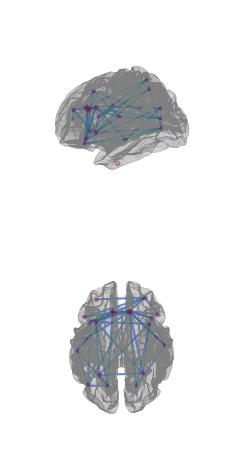

In [13]:
atlasMapping.atlasMapping(NetworkDataGeneral, covTAU_gt_TDP_FD, CoM_TAU_Drop, pathNames_TAU_Drop, markerVecTAU, 
                          colorVecTAU, path_Fig, '3D_Atlas_CovMat_TAU_gt_TDP_FD', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

In [29]:
atlasMapping.save3DGraph(covTAU_gt_TDP_FD, graphDir, "TAU_gt_TDP_Graph(Pathology)(FD)")

## (6) TDP > TAU Fixed Density

In [14]:
covTDP_gt_TAU_FD = fd.fixedDensity(covTDP_gt_TAU_raw_Drop, fd_val)

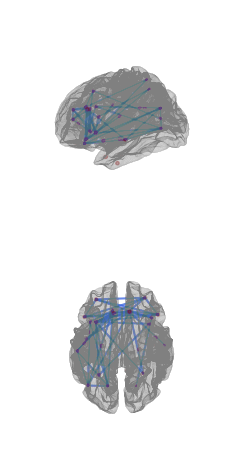

In [15]:
atlasMapping.atlasMapping(NetworkDataGeneral, covTDP_gt_TAU_FD, CoM_TDP_Drop, pathNames_TDP_Drop, markerVecTDP, 
                          colorVecTDP, path_Fig, '3D_Atlas_CovMat_TDP_gt_TAU_FD', covType='sig', nodeTransparency = 0.3, 
                          edgeTransparency = 0.8, atlasTransparency = 0.01, showLabels = 0, surfDisp=None)

In [ ]:
atlasMapping.save3DGraph(covTDP_gt_TAU_FD, graphDir, "TDP_gt_TAU_Graph(Pathology)(FD)")